# 05_feature_engineering: Feature selection to address overfitting

Date: 2022-06-16

We saw from the `01_exploratory_analysis` workbook the top 10 features: 
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- FullBath
- TotRmsAbvGrd
- YearBuilt
- YearRemodAdd


In [1]:
import os
import numpy as np
#os.chdir('..')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in dataset
categorical_cleaned = pd.read_csv('cleaned_data/categorical_cleaned.csv')
training_prices = pd.read_pickle('cleaned_data/training_prices.pkl')
# Add sale price to the cateogorical data set
categorical_cleaned['SalePrice'] = training_prices

In [15]:
categorical_cleaned.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,None,None,None,WD,Normal,208500
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,None,None,None,WD,Normal,181500
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,None,None,None,WD,Normal,223500
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,None,None,None,WD,Abnorml,140000
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,None,None,None,WD,Normal,250000


We may also add some variables that we expect to correlate with price such as: 
- Total Home Area 

## One-way ANOVA for each categorical variable

We would like to do a similar analysis as numeric variables with the categorical variables using ANOVA. 

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
# test one model 
model = ols('SalePrice ~ C(MSSubClass)', data = categorical_cleaned).fit()
aov_table = sm.stats.anova_lm(model, typ = 2)
aov_table[0:1]

,sum_sq,df,F,PR(>F)
C(MSSubClass),2.268056e+12,14.0,33.732076,8.662166e-79


In [29]:
# Loop through all columns 
aov_results = []
for name in categorical_cleaned.columns[0:categorical_cleaned.shape[1]-1]:
    model = ols(f'SalePrice ~ C({name})', data = categorical_cleaned).fit()
    aov_table = sm.stats.anova_lm(model, typ = 2)
    aov_results.append(aov_table[0:1])
all_results = pd.concat(aov_results)
all_results.sort_values('PR(>F)')

,sum_sq,df,F,PR(>F)
C(Neighborhood),5.023606e+12,24.0,71.784865,1.558600e-225
C(ExterQual),4.395744e+12,3.0,443.334831,1.439551e-204
C(BsmtQual),4.281621e+12,4.0,316.148635,8.158548e-196
C(KitchenQual),4.204320e+12,3.0,407.806352,3.032213e-192
C(GarageFinish),2.816458e+12,3.0,213.867028,6.228747e-115
C(FireplaceQu),2.706765e+12,5.0,121.075121,2.971217e-107
C(Foundation),2.360618e+12,5.0,100.253851,5.791895e-91
C(GarageType),2.294650e+12,6.0,80.379992,6.117026e-87
C(MSSubClass),2.268056e+12,14.0,33.732076,8.662166e-79
C(BsmtFinType1),1.941124e+12,6.0,64.688200,2.386358e-71


### Validate findings using boxplots

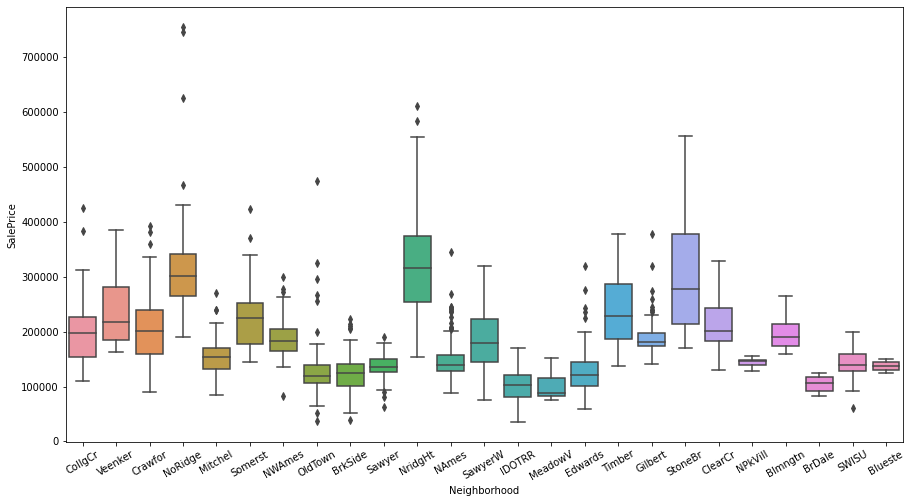

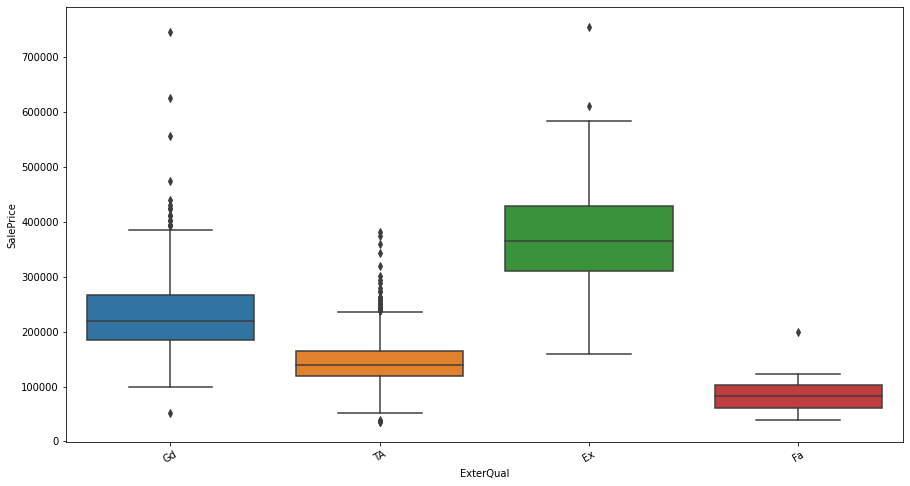

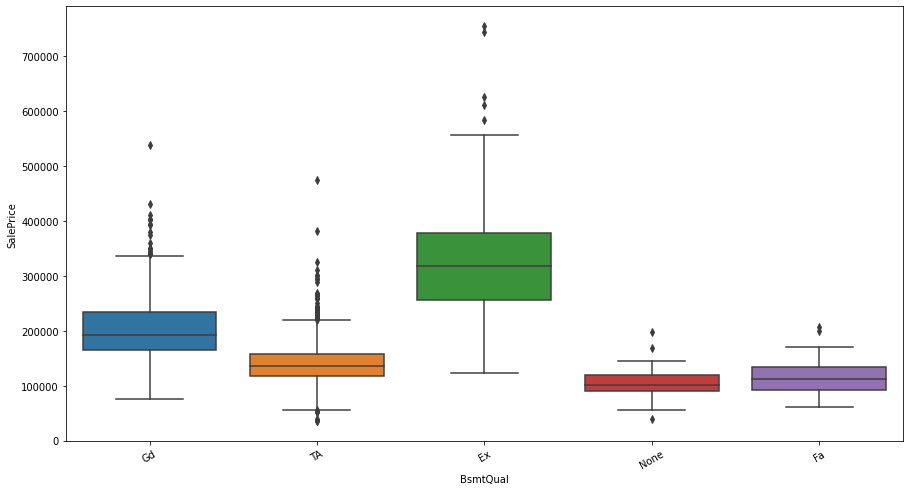

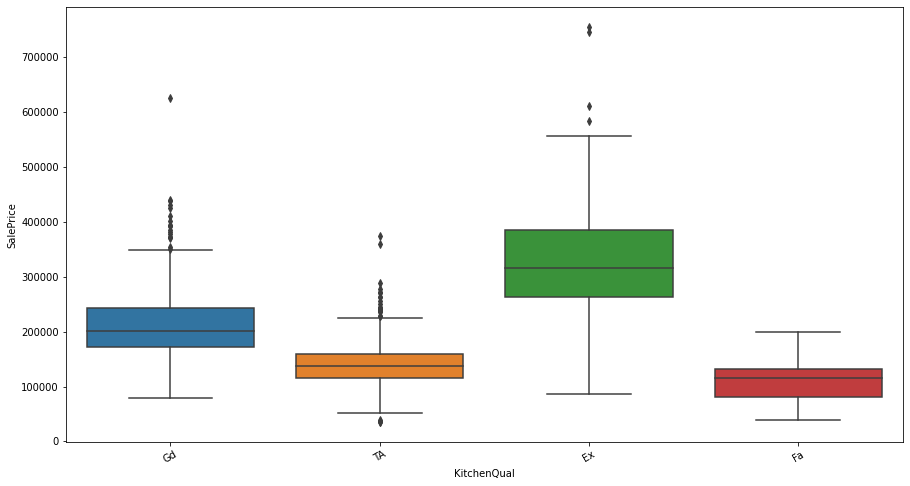

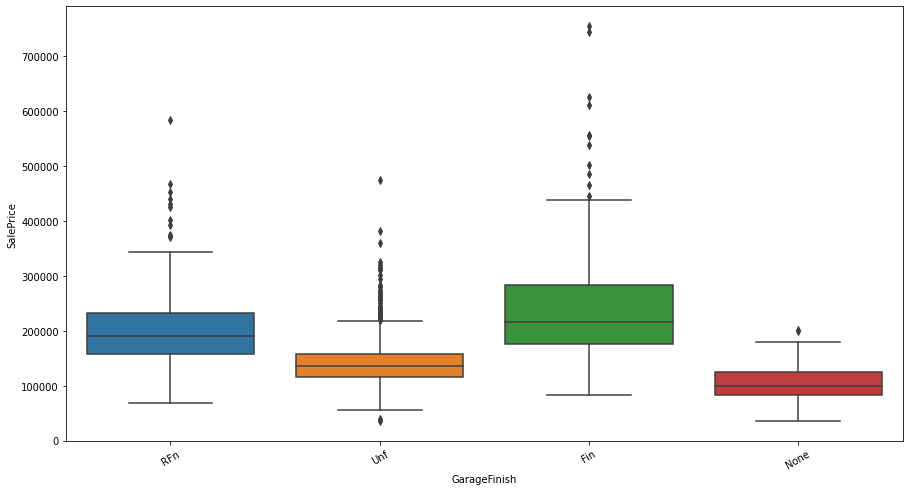

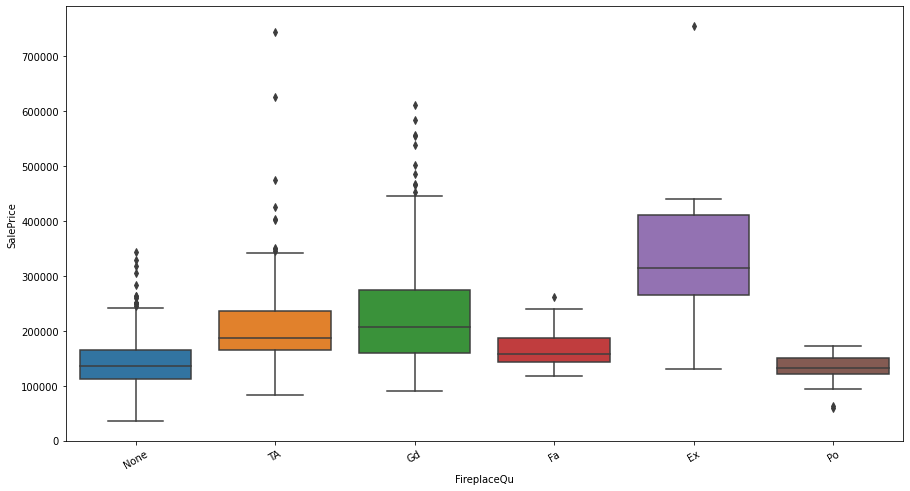

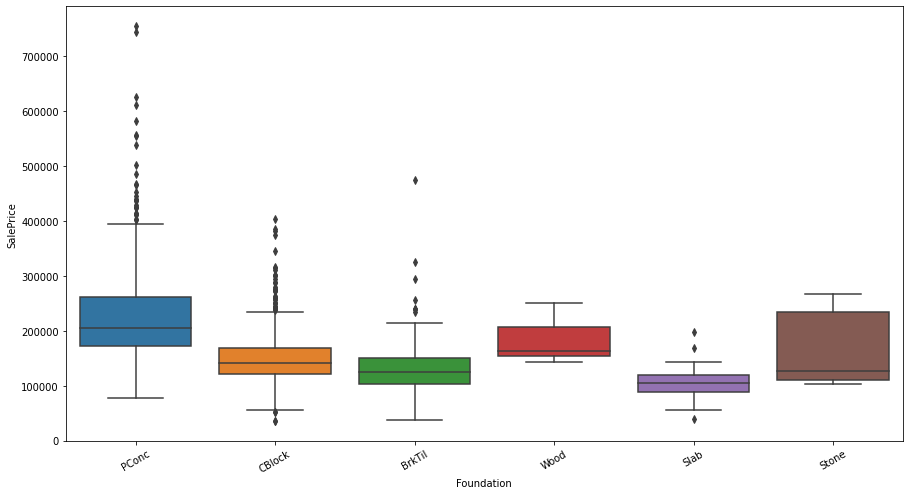

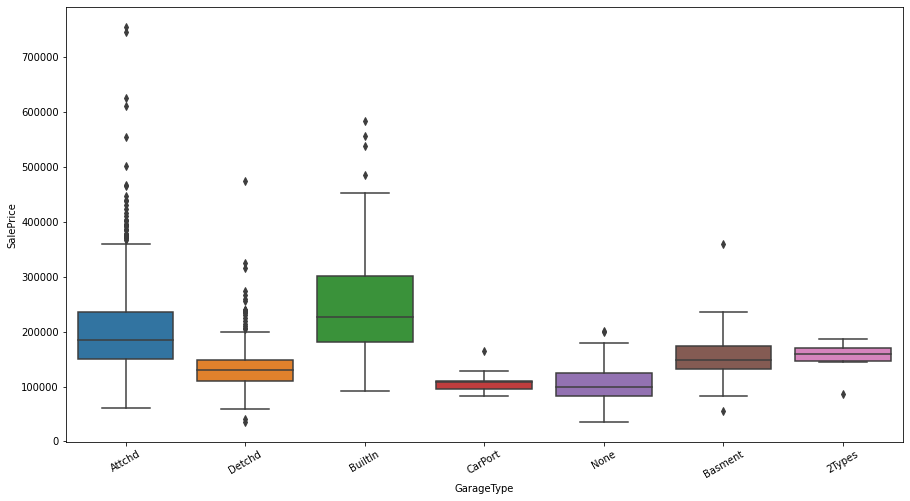

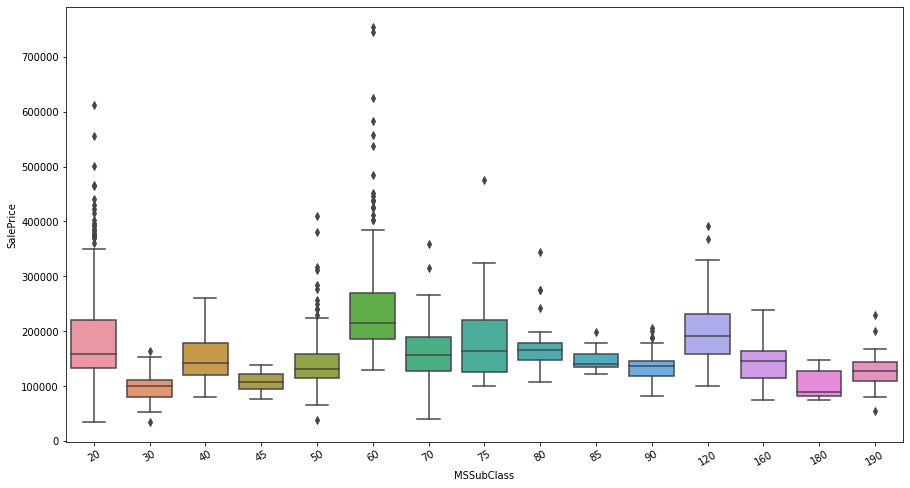

In [41]:
categories = ['Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'FireplaceQu', 'Foundation', 'GarageType', 'MSSubClass']

for item in categories: 
    plt.figure(figsize = (15, 8))
    ax = sns.boxplot(x = categorical_cleaned[item], y = categorical_cleaned['SalePrice'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

Takeaways: 

- Visually, it looks like up to Fireplace Quality has some significant differences by category. 
    - The foundation variable seems to have average prices pretty close to each other
    - The garage type may be useful if it's put into a smaller number of categories (hold for now) 
    - The MSSubClass seems like many are around the same median price. 
- The quality variables could also be changed to numeric values (Ex, Gd, TA, Fa, Po  is Excellent, Good, Typical/Average, Fair and Poor). 



## Modify pipelines to only include these features

**Numerical**
- Add subset to only include top 10 features with high Pearson's correlation 
- Add total house floor area

**Categorical**

- Need to one-hot encode: 
    - Neighborhood
    - GarageFinish 
- Make numerical: 
    - ExterQual
    - BsmtQual
    - KitchenQual
    - FireplaceQual

In [11]:
# load necessary packages
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#read in dataset
data = pd.read_csv('data/train.csv')
#separate predictors from target values 
training = data.drop('SalePrice', axis = 1) 
prices = data['SalePrice'].copy()

#drop these columns from training set 
drop_columns = ['Id', 'GarageYrBlt'] 
training = training.drop(drop_columns, axis = 1)

# get only numeric variables (and omit the MSSubClass variable since it's actually categorical)
train_num = training.select_dtypes(include = 'number').drop(['MSSubClass'], axis = 1)

In [16]:
# Transfomers to help with data cleaning in pipelines 

 # column numbers 
bsmt, first, sec, wood, porch = 8, 9, 10, 11, 12
    

class add_home_area(BaseEstimator, TransformerMixin): 
    """
    Function to add total home area to numeric variables
    """
   
    def fit(self, X, y = None): 
        return self
    
    def transform(self, X): 
        total_area = np.sum(X[:, [bsmt, first, sec, wood, porch]], axis = 1)
        
        return np.c_[X, total_area]

class clean_categorical(BaseEstimator, TransformerMixin):
    """
    Function to change null values to 'None' category since null is not missing but indicates not having that property. 
    """
    def fit(self, X, y = None): 
        return self
    
    def transform(self, X):        
        
        # change NA values to 'None' for each of columns below
        columns_to_change_null_values = ['GarageFinish', 'FireplaceQu', 'BsmtQual']

        for column in columns_to_change_null_values: 
            if column in X.columns:
                X.loc[X[column].isnull(), column] = 'None'
                
        
        return X

class change_to_ordinal(BaseEstimator, TransformerMixin): 
    """
    
    Maps qualitative columns to a numeric value. 
    
    """
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X): 
        
        quality_map = {'Ex': 5,
                       'Gd': 4,
                       'TA': 3, 
                       'Fa': 2, 
                       'Po': 1,
                       'None': 0}
        
        lfunc = lambda x: quality_map[x]
        vfunc = np.vectorize(lfunc)
        
        return vfunc(X)

    
# Define Pipelines 

numeric_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'median')),
    ('home_area', add_home_area()),
    ('scale', MinMaxScaler())
])

cat_pipeline = Pipeline(steps = [
    ('postprocess', clean_categorical()),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

cat_ordinal_pipeline = Pipeline(steps = [
    ('postprocess', clean_categorical()), 
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ordinal', change_to_ordinal())
])

num_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']
cat_one_hot_columns = ['Neighborhood', 'GarageFinish']
cat_ordinal_columns = ['ExterQual', 'BsmtQual', 'KitchenQual', 'FireplaceQu']

#create full pipeline for numeric and categorical
full_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_one_hot_columns),
    ("cat_ordinal", cat_ordinal_pipeline, cat_ordinal_columns), 
    ("num", numeric_pipeline, num_columns)
])

In [17]:
housing_prepared = full_pipeline.fit_transform(training)
#print out first 2 rows
housing_prepared[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 4.        ,
        4.        , 4.        , 0.        , 0.66666667, 0.25923135,
        0.5       , 0.3864598 , 0.66666667, 0.5       , 0.94927536,
        0.88333333, 0.1400982 , 0.11977972, 0.41355932, 0.        ,
        0.11151737, 0.19230124],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.     

In [18]:
colnames_after_one_hot = full_pipeline.transformers_[0][1].named_steps['onehot'].get_feature_names().tolist()
all_columns = colnames_after_one_hot + cat_ordinal_columns + num_columns + ['TotalArea']
# add back column names and change into dataframe
housing_df = pd.DataFrame(housing_prepared, columns = all_columns)
housing_df.head()

,x0_Blmngtn,x0_Blueste,x0_BrDale,x0_BrkSide,x0_ClearCr,x0_CollgCr,x0_Crawfor,x0_Edwards,x0_Gilbert,x0_IDOTRR,...,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,TotalArea
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.666667,0.500000,0.949275,0.883333,0.140098,0.119780,0.413559,0.000000,0.111517,0.192301
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.666667,0.333333,0.753623,0.433333,0.206547,0.212942,0.000000,0.347725,0.000000,0.208655
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.666667,0.333333,0.934783,0.866667,0.150573,0.134465,0.419370,0.000000,0.076782,0.202449
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.333333,0.416667,0.311594,0.333333,0.123732,0.143873,0.366102,0.000000,0.063985,0.182321
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.666667,0.583333,0.927536,0.833333,0.187398,0.186095,0.509927,0.224037,0.153565,0.275495


In [19]:
#save data
housing_df.to_pickle('cleaned_data/training_cleaned.pkl')
housing_df.to_csv('cleaned_data/training_cleaned.csv')

In [20]:
# transform test data

#read in dataset
test = pd.read_csv('data/test.csv')
test.head()

#drop these columns from test set 
drop_columns = ['Id', 'GarageYrBlt'] 
test = test.drop(drop_columns, axis = 1)

#run test data through pipeline
test_prepared = full_pipeline.transform(test)

# add back column names and change into dataframe
test_df = pd.DataFrame(test_prepared, columns = all_columns)
test_df.head()

#save data
test_df.to_pickle('cleaned_data/test_cleaned.pkl')
test_df.to_csv('cleaned_data/test_cleaned.csv')